In [ ]:
【例12.1】线性可分—求出分离两类点的分隔线。

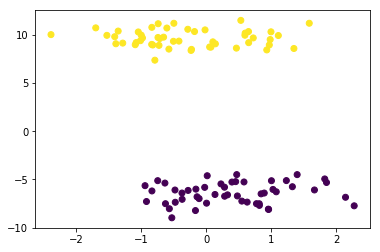

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 生成两组点
data ,target=make_blobs(centers=2)
plt.scatter(data[:,0],data[:,1],c=target)   # 散点图如图12-4所示 

In [2]:
from sklearn.svm import SVC,SVR
svc=SVC(kernel='linear')
svc.fit(data,target)
svc.support_vectors_   # 查看支持向量

array([[ 0.47113489, -4.50120223],
       [-0.78996747,  7.37744477]])

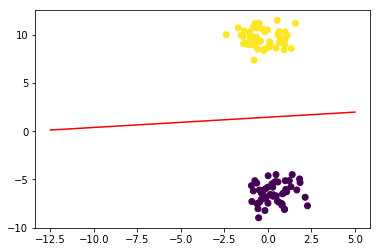

In [3]:
w1,w2=svc.coef_[0,0],svc.coef_[0,1]   # 系数w和b
b=svc.intercept_  
x=np.linspace(-12.5,5.0,100)
y=-w1/w2*x-b/w2          #  w1*x+w2*y+b=0  
plt.scatter(data[:,0],data[:,1],c=target)
plt.plot(x,y,c='r')  # 分隔线如图12-5所示

In [ ]:
【例12.2】非线性可分-多项式核函数举例。

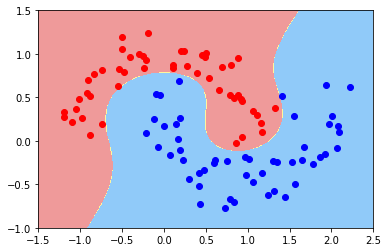

In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap
import warnings
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
    np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
    np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)
def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('linearSVC',LinearSVC(C=1e9))
    ])
warnings.filterwarnings("ignore")
poly_svc = PolynomialSVC(degree=3)
X,y = datasets.make_moons(noise=0.15,random_state=666)
poly_svc.fit(X,y)
plot_decision_boundary(poly_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1],c='red')
plt.scatter(X[y==1,0],X[y==1,1],c='blue')
plt.show()  # 运行结果如图12-6所示